## GRU architecture

In [1]:
from __future__ import print_function

In [2]:
# Importing libraries
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import GRU
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb


C:\Users\nupur\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# Embedding (ref[1])
max_features = 20000 
maxlen = 100
embedding_size = 128

In [4]:
# Convolution(ref[1])
kernel_size = 5
filters = 64
pool_size = 4

In [5]:
# GRU
gru_output_size = 70

In [6]:
# Training
batch_size = 512
epochs = 20

In [7]:
# Splitting data into test and train data 
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [8]:
# Printing shape of train and test data
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [9]:
# Defining the model (ref[1])
print('Build model...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(GRU(gru_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))



Build model...


In [11]:
# We configure our model with the rmsprop optimizer and the binary_crossentropy loss function
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# Fitting the model
print('Train...')
a=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 89s 4ms/step - loss: 0.5836 - acc: 0.6868 - val_loss: 0.3821 - val_acc: 0.8272
Epoch 2/20
25000/25000 [==============================] - 95s 4ms/step - loss: 0.2853 - acc: 0.8809 - val_loss: 0.3436 - val_acc: 0.8505
Epoch 3/20
25000/25000 [==============================] - 87s 3ms/step - loss: 0.1726 - acc: 0.9373 - val_loss: 0.4004 - val_acc: 0.8401
Epoch 4/20
25000/25000 [==============================] - 87s 3ms/step - loss: 0.1153 - acc: 0.9590 - val_loss: 0.4773 - val_acc: 0.8365
Epoch 5/20
25000/25000 [==============================] - 88s 4ms/step - loss: 0.0780 - acc: 0.9741 - val_loss: 0.5462 - val_acc: 0.8313
Epoch 6/20
25000/25000 [==============================] - 88s 4ms/step - loss: 0.0459 - acc: 0.9852 - val_loss: 0.6774 - val_acc: 0.8215
Epoch 7/20
25000/25000 [==============================] - 91s 4ms/step - loss: 0.0293 - acc: 0.9908 - val_loss: 0.7257 

In [13]:
# The call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training
history_dict = a.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

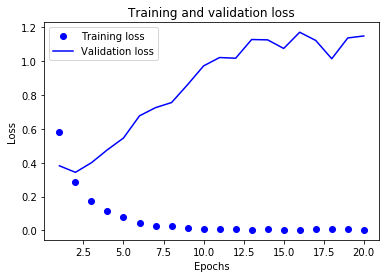

In [14]:
#Plotting training loss v/s validation loss
import matplotlib.pyplot as plt

#acc = history.history['acc']
#val_acc = history.history['val_acc']
acc = a.history['acc']
val_acc = a.history['val_acc']
loss = a.history['loss']
val_loss = a.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

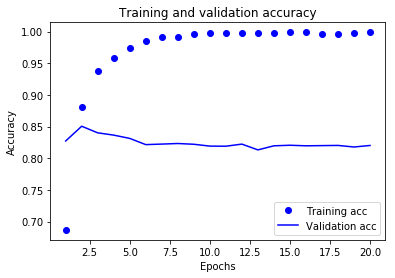

In [15]:
# Plotting training loss v/s validation accuracy
plt.clf()   # clear figure
#acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [16]:
# Training
batch_size = 512
epochs = 4
print('Train...')
a=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 86s 3ms/step - loss: 0.0032 - acc: 0.9992 - val_loss: 1.2567 - val_acc: 0.8204
Epoch 2/4
25000/25000 [==============================] - 91s 4ms/step - loss: 0.0037 - acc: 0.9988 - val_loss: 1.2692 - val_acc: 0.8184
Epoch 3/4
25000/25000 [==============================] - 99s 4ms/step - loss: 0.0035 - acc: 0.9992 - val_loss: 1.2253 - val_acc: 0.8200
Epoch 4/4
25000/25000 [==============================] - 26s 1ms/step
Test score: 1.3542346979522706
Test accuracy: 0.8162799998664856


In [17]:
#Evaluation
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 27s 1ms/step


In [18]:
# Printing the results
results

[1.3542346955634468, 0.81628]

In [19]:
# Predicting the model
model.predict(x_test)

array([[9.9986458e-01],
       [9.9999952e-01],
       [9.9999893e-01],
       ...,
       [1.7587876e-05],
       [1.9235406e-02],
       [9.9919212e-01]], dtype=float32)

ref[1]: https://medium.com/@thoszymkowiak/how-to-implement-sentiment-analysis-using-word-embedding-and-convolutional-neural-networks-on-keras-163197aef623

The text in the document by Neha Gaikwad and Nupur Deshpande is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

The code in the document by Neha Gaikwad and Nupur Deshpande is licensed under the MIT License https://opensource.org/licenses/MIT